<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/density_of_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Calculation of density of gases
#@markdown Demonstration of ideal gas law and equations of state. An introduction to equations of state can be seen in the [EoS Wikipedia pages](https://en.wikipedia.org/wiki/Equation_of_state).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

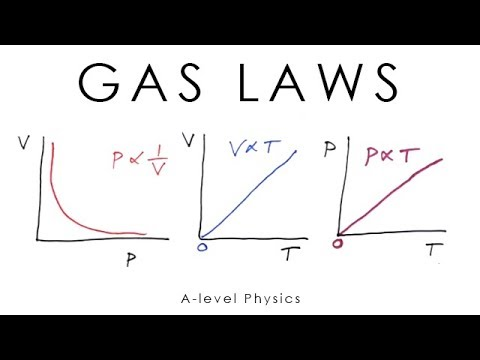

In [32]:
#@title Introduction to Gas Laws
#@markdown This video gives an intriduction to behavour of gases as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('QhnlyHV8evY', width=600, height=400)

# Comparison of ideal and real gas behaviour

In the following example we use the ideal gas law and the PR/SRK-EOS to calculate the density of a pure component gas.  At low pressure we see that the ideal gas and the real density are the same, at higher pressures the real gas density is higher, while at very high pressures the ideal gas density is the highest. The reason for this is that at intermediate pressures, the atractive forces is dominating, while at very high pressures repulsive forces starts to dominate.

The ideal gas equation of state is $pV=nRT$ where $R$ is the gas constant $8.314kJ/mol$. The real gas equation of state is given on the form $pV=ZnRT$ where $Z$ is the gas compressibility factor. THe density can be calculated from $\rho=n/V\times M$ where $M$is the molar mass.

Use the form to select molecule, temperature and pressure range, and calculate the density and compressibility of the gas. Can you find a gas that shifts from gas to liquid when pressure is increased?

molar mass of  nitrogen  is  28.0135  kg/mol


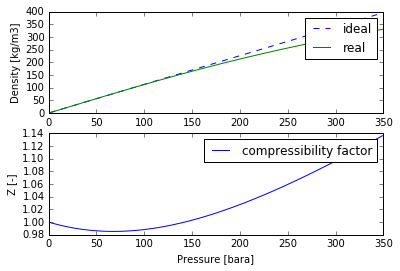

In [33]:
#@title Select component and equation of state. Set temperature [K] and pressure range [bara]. { run: "auto" }
componentName = "nitrogen" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 298.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 350.0  #@param {type:"number"}
eosname = "pr" #@param ["srk", "pr"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.init(0); 

print('molar mass of ', componentName, ' is ', fluid1.getMolarMass()*1000 , ' kg/mol')

def idealgasdensity(pressure, temperature):
  m3permol = R*temperature/(pressure*1e5)
  m3perkg = m3permol/fluid1.getMolarMass()
  return 1.0/m3perkg

def realgasdensity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getDensity('kg/m3')

def compressibility(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getZ()

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
idealdensity = [idealgasdensity(P,temperature) for P in pressure]
realdensity = [realgasdensity(P,temperature) for P in pressure]
compressibility = [compressibility(P,temperature) for P in pressure]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, idealdensity, '--')
plt.plot(pressure, realdensity, '-')
plt.xlabel('Pressure [bara]')
plt.ylabel('Density [kg/m3]')
plt.legend(['ideal', 'real'])
plt.subplot(2, 1, 2)
plt.plot(pressure, compressibility, '-')
plt.xlabel('Pressure [bara]')
plt.ylabel('Z [-]')
plt.legend(['compressibility factor'])

# Pressure of gas as function of volume

1 m3 methane at 1 bar and 25 C is compressed to 200 bar and cooled to 25 C. What is
the volume of the gas? What is the density of the compressed gas?

In [34]:
componentName = "nitrogen" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 298.15   #@param {type:"number"}
initialVolume = 1.0  #@param {type:"number"}
initialPressure = 1.0  #@param {type:"number"}
endPressure = 10.0  #@param {type:"number"}
R = 8.314 # J/mol/K

initialMoles = initialPressure*1e5*1.0/(R*temperature)

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, initialMoles) #adding 1 Sm3 to the fluid
fluid1.setTemperature(temperature)
fluid1.setPressure(initialPressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()
startVolume = fluid1.getVolume('m3/sec')


print('initialVolume ', startVolume, 'm3')
print('initial gas density ', fluid1.getDensity('kg/m3'), 'kg/m3')
print('initial gas compressiility ', fluid1.getZ(), ' [-]')
      
fluid1.setPressure(endPressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()

endVolume = fluid1.getVolume('m3/sec')
print('end volume ', fluid1.getVolume('Sm3/sec'), 'm3')
print('volume ratio ', endVolume/startVolume, ' m3/m3')
print('end gas density ', fluid1.getDensity('kg/m3'), ' kg/m3')
print('end gas compressibility ', fluid1.getZ(), ' [-]')

initialVolume  1.0000083601119607 m3
initial gas density  1.1301476964655142 kg/m3
initial gas compressiility  0.9999527817885948  [-]
end volume  0.09997979623211148 m3
volume ratio  0.09997896039680884  m3/m3
end gas density  11.30767486281327  kg/m3
end gas compressibility  0.9997423956912075  [-]


# Calculation of density of LNG
The density of liquified methane at the boiling point at atomspheric pressure can be calcuated as demonstrated in the following example. In this case we use the SRK EoS and the PR-EoS.

In [35]:
# Creating a fluid in neqsim
eos = 'srk' #@param ["srk", "pr"]
pressure = 1.01325 #@param {type:"number"}
temperature = -162.0 #@param {type:"number"}
fluid1 = fluid(eos) #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0)
fluid1.setTemperature(temperature)
fluid1.setPressure(pressure)
bubt(fluid1)
fluid1.initPhysicalProperties()
print('temperature at boiling point ', fluid1.getTemperature()-273.15, 'C')
print('LNG density ', fluid1.getDensity('kg/m3'), ' kg/m3')


temperature at boiling point  -161.1441471093413 C
LNG density  428.1719693971862  kg/m3


# Accuracy of EoS for calculating the density
The density calculated with any equation of state will have an uncertainty. The GERG-2008 is a reference equation of state with high accuracy in prediction of thermodynamic properties. In the following example we compare the gas density calculations of SRK/PR with the GERG-(2008 version)-EoS.

Text(0, 0.5, 'Deviation [%]')

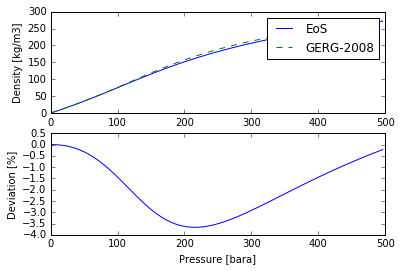

In [36]:
#@title Select component and equation of state. Set temperature [K] and pressure range [bara]. { run: "auto" }
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 298.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 500.0  #@param {type:"number"}
eosname = "srk" #@param ["srk", "pr"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.init(0); 


def realgasdensity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getDensity('kg/m3')

def GERGgasdensity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    return fluid1.getPhase('gas').getDensity_GERG2008()

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
realdensity = [realgasdensity(P,temperature) for P in pressure]
GERG2008density = [GERGgasdensity(P,temperature) for P in pressure]
deviation = [((realgasdensity(P,temperature)-GERGgasdensity(P,temperature))/GERGgasdensity(P,temperature)*100.0) for P in pressure]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, realdensity, '-')
plt.plot(pressure, GERG2008density, '--')
plt.xlabel('Pressure [bara]')
plt.ylabel('Density [kg/m3]')
plt.legend(['EoS', 'GERG-2008'])
plt.subplot(2, 1, 2)

plt.plot(pressure, deviation)
plt.xlabel('Pressure [bara]')
plt.ylabel('Deviation [%]')